In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

#Movies DataFrame
movies= pd.read_csv('movies - movies.csv')
movies






,id,original_title,https://api.themoviedb.org/3/movie/popular?api_key=<<api_key>>&language=en-US&page=1,original_language,release_date,genre_ids,poster_path,vote_average,vote_count
0,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,"[16, 12, 14, 10751, 28, 18]",/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823
1,587807,Tom & Jerry,Tom & Jerry,en,2021-02-11,"[28, 35, 10751, 16, 12]",/6KErczPBROQty7QoIsaa6wJYXZi.jpg,7.7,738
2,484718,Coming 2 America,Coming 2 America,en,2021-03-05,[35],/nWBPLkqNApY5pgrJFMiI9joSI30.jpg,7.1,592
3,458576,Monster Hunter,Monster Hunter,en,2020-12-03,"[14, 28, 12]",/1UCOF11QCw8kcqvce8LKOO6pimh.jpg,7.3,1045
4,464052,Wonder Woman 1984,Wonder Woman 1984,en,2020-12-16,"[14, 28, 12]",/8UlWHLMpgZm9bx6QYh0NFoq67TZ.jpg,6.9,4149
...,...,...,...,...,...,...,...,...,...
9995,66150,Life in a Day,Life in a Day,en,2011-01-27,"[99, 18]",/kI2n9GnDhXaJfLHdcZvo69ZI1Nt.jpg,7.2,148
9996,14849,Dead Like Me: Life After Death,Dead Like Me: Life After Death,en,2009-02-17,"[18, 14, 35]",/Ar7uTVlawrZRmLad0TrgkhxsTGP.jpg,6.1,135
9997,9442,Dead Men Don't Wear Plaid,Dead Men Don't Wear Plaid,en,1982-05-21,"[35, 9648]",/pjqnVq8DevXTrjplhWOqNS7y75v.jpg,6.6,226
9998,135403,Freddie Mercury: The Great Pretender,Freddie Mercury: The Great Pretender,en,2012-09-25,"[99, 10402]",/gsLxEqwSaMWMaZtOSw0ff5kB9kq.jpg,7.4,48


### Check null values

In [59]:

movies.isnull().sum()

id                                                                                       0
original_title                                                                           0
https://api.themoviedb.org/3/movie/popular?api_key=<<api_key>>&language=en-US&page=1     0
original_language                                                                        0
release_date                                                                            26
genre_ids                                                                                0
poster_path                                                                             46
vote_average                                                                             0
vote_count                                                                               0
dtype: int64

In [60]:
# The list is a list of integers  , reason why a I made this function .

map_gender={"28":"Action",
"12":"Adventure",
"16":"Animation",
"35":"Comedy",
"80":"Crime",
"99":"Documentary",
"18":"Drama",
"10751":"Family",
"14":"Fantasy",
"36":	"History",
"27":"Horror",
"10402"	:"Music",
"9648":"Mystery",
"10749":"Romance",
"878"	:"Science Fiction",
"10770":"TV Movie",
"53":"Thriller",
"10752":"War",
"37":"Western" }

def map_multiclass(x):
  
  tmp=[]  
  for y in x.split(","):
   
    y=y.replace('[', '') 
    y=y.replace(']', '') 
    y=y.replace(' ', '') 
 
    if y in map_gender:
   
     tmp.append(map_gender[y])

  return ','.join(tmp)


#movies['genre_ids'].apply(lambda x: [ y for y in x])#ReOrg2021
#movies['genre_ids'].apply(lambda x: [map_gender.get(y) for y in x.split(",")] )
movies['genre_ids2']=movies['genre_ids'].apply(lambda x: map_multiclass(x))



In [61]:
movies

,id,original_title,https://api.themoviedb.org/3/movie/popular?api_key=<<api_key>>&language=en-US&page=1,original_language,release_date,genre_ids,poster_path,vote_average,vote_count,genre_ids2
0,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,"[16, 12, 14, 10751, 28, 18]",/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823,"Animation,Adventure,Fantasy,Family,Action,Drama"
1,587807,Tom & Jerry,Tom & Jerry,en,2021-02-11,"[28, 35, 10751, 16, 12]",/6KErczPBROQty7QoIsaa6wJYXZi.jpg,7.7,738,"Action,Comedy,Family,Animation,Adventure"
2,484718,Coming 2 America,Coming 2 America,en,2021-03-05,[35],/nWBPLkqNApY5pgrJFMiI9joSI30.jpg,7.1,592,Comedy
3,458576,Monster Hunter,Monster Hunter,en,2020-12-03,"[14, 28, 12]",/1UCOF11QCw8kcqvce8LKOO6pimh.jpg,7.3,1045,"Fantasy,Action,Adventure"
4,464052,Wonder Woman 1984,Wonder Woman 1984,en,2020-12-16,"[14, 28, 12]",/8UlWHLMpgZm9bx6QYh0NFoq67TZ.jpg,6.9,4149,"Fantasy,Action,Adventure"
...,...,...,...,...,...,...,...,...,...,...
9995,66150,Life in a Day,Life in a Day,en,2011-01-27,"[99, 18]",/kI2n9GnDhXaJfLHdcZvo69ZI1Nt.jpg,7.2,148,"Documentary,Drama"
9996,14849,Dead Like Me: Life After Death,Dead Like Me: Life After Death,en,2009-02-17,"[18, 14, 35]",/Ar7uTVlawrZRmLad0TrgkhxsTGP.jpg,6.1,135,"Drama,Fantasy,Comedy"
9997,9442,Dead Men Don't Wear Plaid,Dead Men Don't Wear Plaid,en,1982-05-21,"[35, 9648]",/pjqnVq8DevXTrjplhWOqNS7y75v.jpg,6.6,226,"Comedy,Mystery"
9998,135403,Freddie Mercury: The Great Pretender,Freddie Mercury: The Great Pretender,en,2012-09-25,"[99, 10402]",/gsLxEqwSaMWMaZtOSw0ff5kB9kq.jpg,7.4,48,"Documentary,Music"


## Dist of genders

## Toop 30 multiclasses

In [97]:
top30=pd.DataFrame(movies.genre_ids2.value_counts(normalize=True).sort_values(ascending=False)[0:30]).reset_index().rename(columns={'index': 'Multiclass'})
top30

,Multiclass,genre_ids2
0,Drama,0.0516
1,Comedy,0.0466
2,Horror,0.0257
3,"Drama,Romance",0.0237
4,"Horror,Thriller",0.0216
5,"Comedy,Romance",0.0207
6,Documentary,0.0194
7,"Comedy,Drama",0.0163
8,"Comedy,Drama,Romance",0.0137
9,"Action,Thriller",0.0129


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

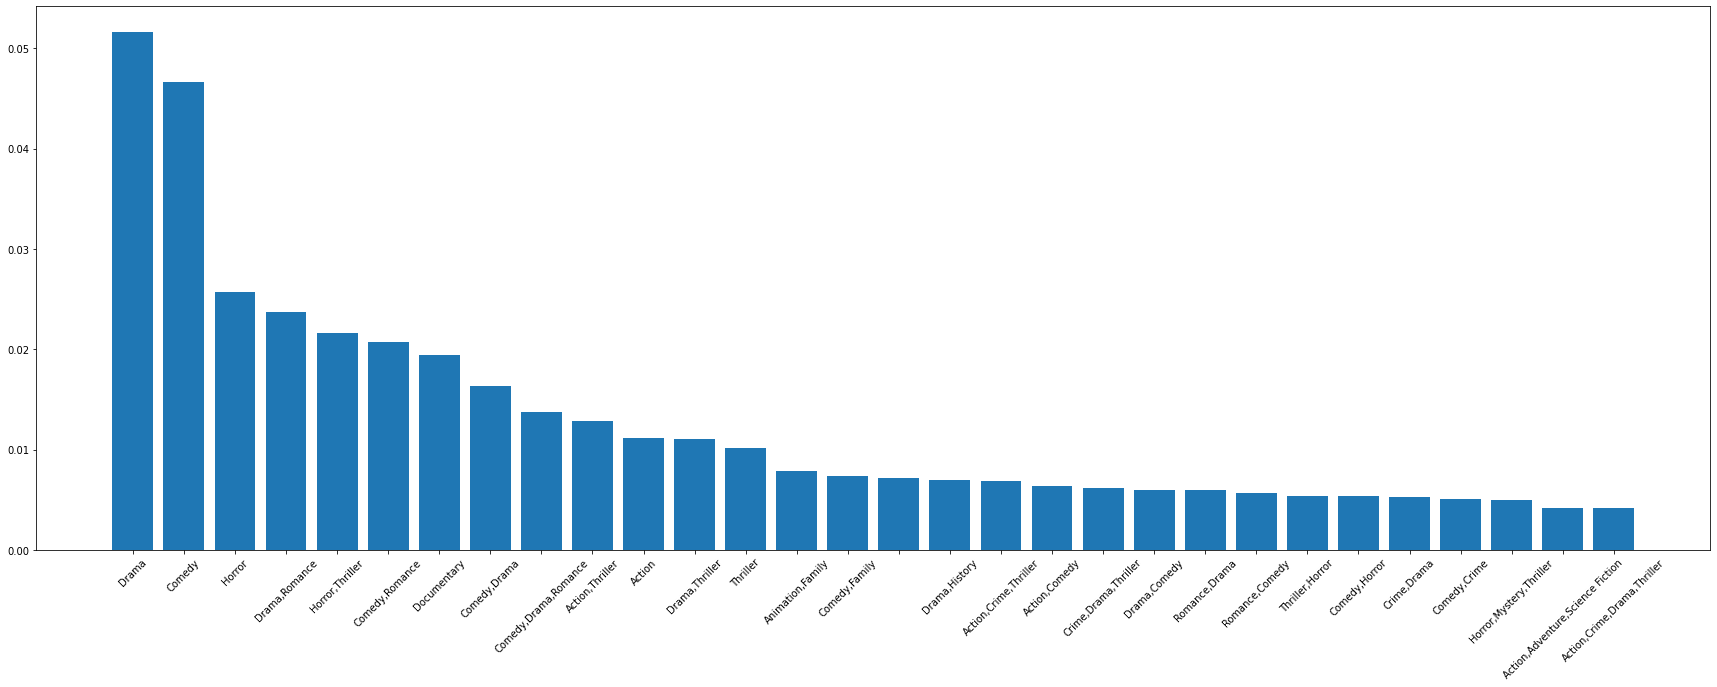

In [99]:

plt.figure(figsize=(30,10)) 
plt.bar(top30.Multiclass,top30.genre_ids2)
plt.xticks(rotation=45) 

## Review gender name  Explode the gender list in x rows to make a class and not multiclass

In [101]:
movies= pd.read_csv('movies - movies.csv')

movies['genre_ids'] = movies['genre_ids'].apply(literal_eval) #convert to list type type was extrange in the excel
movie_gender=movies.explode('genre_ids')

movie_gender[movie_gender.original_title=='Raya and the Last Dragon']

# the movie is x times depend on the gender 

,id,original_title,https://api.themoviedb.org/3/movie/popular?api_key=<<api_key>>&language=en-US&page=1,original_language,release_date,genre_ids,poster_path,vote_average,vote_count
0,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,16,/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823
0,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,12,/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823
0,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,14,/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823
0,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,10751,/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823
0,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,28,/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823
0,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,18,/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823


In [110]:
movie_gender.shape

(25830, 9)

## merge both datasets

In [104]:
gender_list= pd.read_csv('movie_genres - movie_genres.csv')

In [105]:
movie_gender_name=pd.merge(movie_gender,gender_list,left_on='genre_ids', right_on='id')

In [111]:
movie_gender_name[movie_gender_name.original_title=='Raya and the Last Dragon']

,id_x,original_title,https://api.themoviedb.org/3/movie/popular?api_key=<<api_key>>&language=en-US&page=1,original_language,release_date,genre_ids,poster_path,vote_average,vote_count,id_y,name
0,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,16,/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823,16,Animation
1259,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,12,/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823,12,Adventure
2963,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,14,/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823,14,Fantasy
4189,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,10751,/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823,10751,Family
5556,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,28,/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823,28,Action
8158,527774,Raya and the Last Dragon,Raya and the Last Dragon,en,2021-03-03,18,/lPsD10PP4rgUGiGR4CCXA6iY0QQ.jpg,8.6,823,18,Drama


## Check nulls  note poster can have null values but not the gender

In [112]:
movie_gender_name.isnull().sum()

id_x                                                                                     0
original_title                                                                           0
https://api.themoviedb.org/3/movie/popular?api_key=<<api_key>>&language=en-US&page=1     0
original_language                                                                        0
release_date                                                                            59
genre_ids                                                                                0
poster_path                                                                             62
vote_average                                                                             0
vote_count                                                                               0
id_y                                                                                     0
name                                                                                     0

In [116]:
top30_separateClass=pd.DataFrame(movie_gender_name.name.value_counts()).reset_index().rename(columns={'index': 'class_'})
top30_separateClass

,class_,name
0,Drama,3806
1,Comedy,3114
2,Thriller,2623
3,Action,2602
4,Adventure,1704
5,Horror,1571
6,Romance,1436
7,Family,1367
8,Science Fiction,1292
9,Animation,1259


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

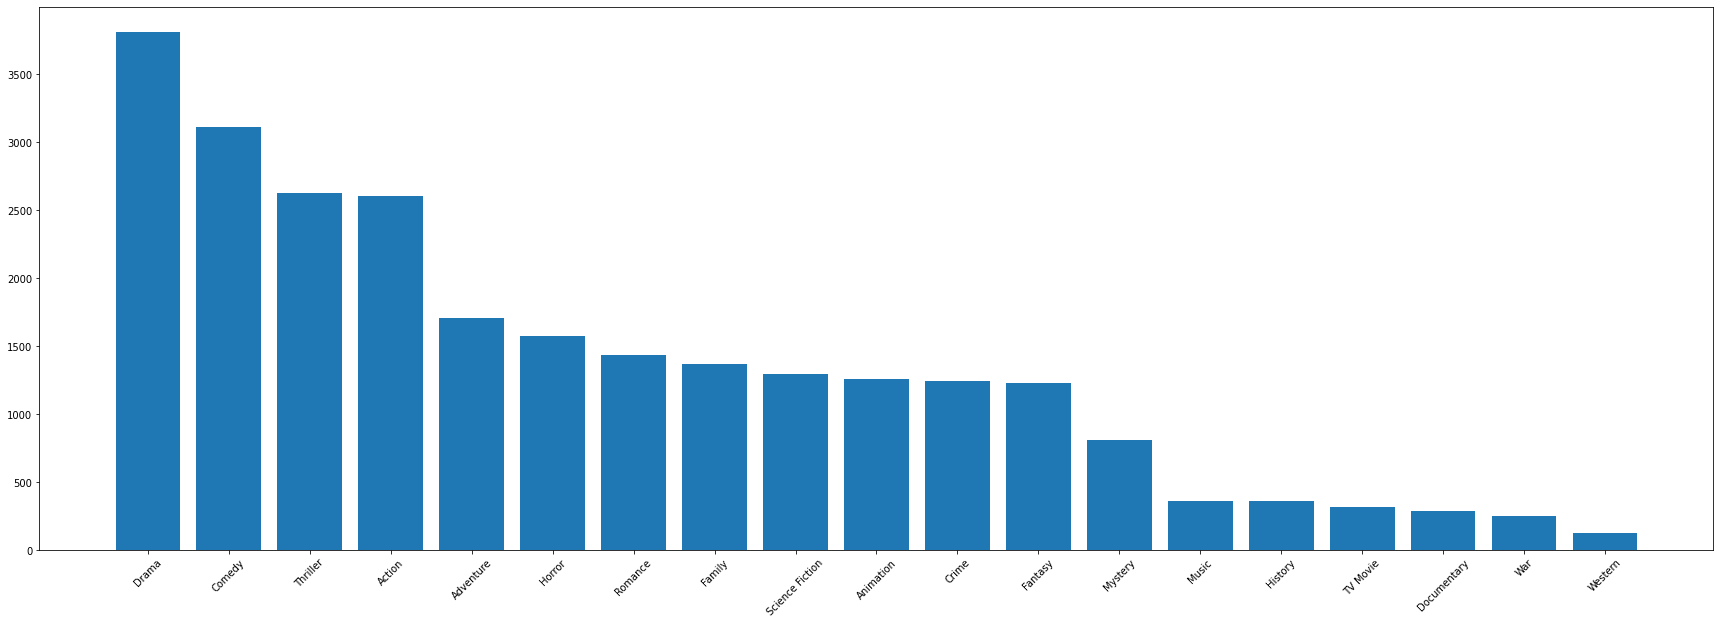

In [118]:

plt.figure(figsize=(30,10)) 
plt.bar(top30_separateClass.class_,top30_separateClass.name)
plt.xticks(rotation=45) 

In [ ]:
#df.to_parquet(DATA_DIR + 'df.parquet.gzip', compression='gzip')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd /content/gdrive/My Drive/Github_rainer
